In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


****************************************
RUNNING IN DEVELOP
****************************************


In [10]:
cs = ["slide_21","slide_22","slide_26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
[#new anti correlated best
#55,56,59,63,83,94,95,100,121,125,131.2,            11
#strong signal medium anti correlation:
#43,80,98,102,103,Nenad                             6
]
lb = ["P055","P056","P059","P063","P083","P094","P095","P100","P121","P125","P131.2","P043","P080","P098","P102","P103","Nenad"]

spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
spots_dj = spots_dj.filter(circle_quality__gte = 0.4)
spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)


In [11]:
reload(a2)


<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analyse_wepdata/analysis2.pyc'>

In [12]:
data = a2.Data(spots_dj=spots_dj)
lb_clean = data.x.columns
pbs = [list(lb_clean[:i]) for i in range(1,len(lb_clean))]


In [14]:
frames = []

for pb in pbs:
    spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pb)
    data = a2.Data(spots_dj=spots_this)
    data = data.sample_on_collection(60).clean().norm()
    #ana = a2.Analysis(data, train_test = data.train_test_combinations[:25])
    ana = a2.Analysis(data)
    ana.calculate_all()
    frames.append(ana.all_score())


*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collectio

In [15]:
pbs_len = [len(lb_clean[:i]) for i in range(1,len(lb_clean))]

In [16]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches",'Classifier Name', 'Analyte Batch']


In [17]:
import matplotlib.cm as cm



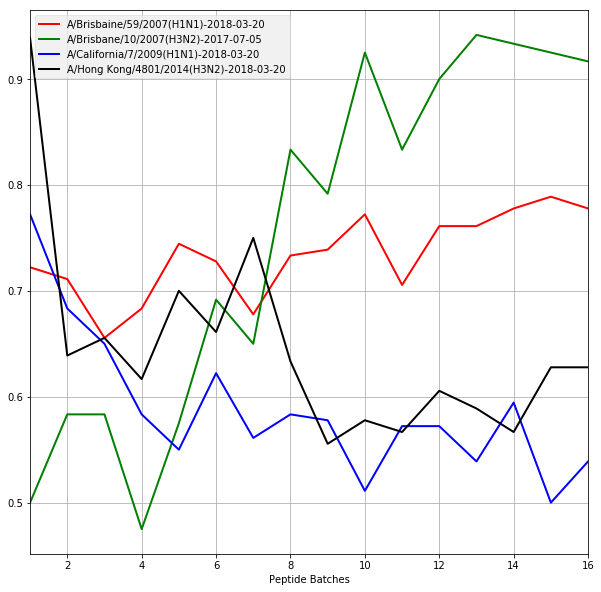

In [19]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
#mpl.style.use('seaborn')
mpl.style.use('bmh')
colors = cm.rainbow(np.linspace(0, 1, 4))
colors = ["r","g","b","k"]
for (n, d),c in zip(result.reset_index().groupby(["Analyte Batch"]),colors):
    d.plot(x="Peptide Batches",y="Score", ax=ax,label=n, color=c)
    d.
    #d.plot(x="Peptide Batches",y="Majority Score", ax=ax, style="--",color=c )
plt.show()


In [22]:
import seaborn as sns; sns.set(color_codes=True)
gammas = sns.load_dataset("gammas")
gammas

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992
5,0.0,IPS,5,-0.073709
6,0.0,IPS,6,3.542734
7,0.0,IPS,7,0.080169
8,0.0,IPS,8,1.547083
9,0.0,IPS,9,2.827153
